# Población Ciudad Autónoma de Buenos Aires

Se realiza extracción de los datos de la página oficial del INDEC (Instituto Nacional de Estadística y Censos) de Argnetina, para obtener por periodo de Censo (Años 2010 - 2022) la población por comuna de CABA. La variación entre ambos censos se utilizó para proratear en los periodos (Años 2011 y 2021) dado que esta infomación podría favorecer los gráficos de los KPI's que se necesitan crear a partir de los datos de los siniestros viales que han terminado con la vidad de los habitantes de la ciudad.

Extracción, Transformación y Limpiza de los datos de la población de la Ciudad Autónoma de Buenos Aires:

#### 1. Descarga de librería necesarias:

In [2]:
import pandas as pd                                                           # Para abrir y transformar los archivos
from urllib.request import urlretrieve                                        # Para leer y guardar los archivos originales
import openpyxl                                                               # Para manipular los archivos en excel
import seaborn as sns                                                         # Para los gráficos
import matplotlib.pyplot as plt                                               # Para los estilos de gráfico

#### 2. Descargar archivo orginal y guardarlo en la carpeta "Datos_Originales":

In [3]:
# URL del archivo Excel
url = 'https://www.indec.gob.ar/ftp/cuadros/poblacion/c2022_caba_est_c1_1.xlsx'

# Ruta local donde se guardará el archivo
local_file_path = "Datos_Originales/Población_CABA.xlsx"

# Descargar el archivo desde la URL y guardarlo localmente
urlretrieve(url, local_file_path)

# Crear un objeto ExcelFile para manejar la estructura del archivo Excel
wb = openpyxl.load_workbook(local_file_path, data_only=True)

# Obtener la lista de nombres de hojas
sheet_names = wb.sheetnames

# Imprimir los nombres de las hojas disponibles
print("Hojas disponibles:", sheet_names)

Hojas disponibles: ['Carátula', 'Índice', 'Cuadro 1.1']


A través de openpyxl, se crea un objeto "ExcelFile" del que se pueden obtener los nombres con el método "Sheetnames" y manipular eficientemente el archivo de excel.

#### 3. Crear Datafrome de la hoja específica del archivo de excel:

In [4]:
# Crear un objeto ExcelFile para manejar el archivo Excel
xl = pd.ExcelFile(local_file_path)

# crear dataframe
df = xl.parse('Cuadro 1.1',skiprows=0)

# Definir Columnas
df.columns = ["Código", "Comuna", "Población 2010", "Población 2022", "Variación","% Variación"]

# Ubicar la fila que contiene la palabra "Total" y eliminar los registros (filas) anteriores a esta fila

total_row_index = df[df.iloc[:, 1] == "Total"].index    # Número de fila
start_row_index = total_row_index[0]                    # índice de la fila encontrada
df = df.iloc[start_row_index+1:, :]                     # Eliminación desde el índice definido hasta la primer fila

# Filtrar las filas que tienen números en la columna "Población 2010" (eliminar últimas filas)
df = df.dropna(subset=['Población 2010'])


# Reiniciar los índices después de la eliminación
df.reset_index(drop=True, inplace=True)

In [5]:
df.head()

,Código,Comuna,Población 2010,Población 2022,Variación,% Variación
0,02007,Comuna 1,205886,223554.0,17668,8.6
1,02014,Comuna 2,157932,161645.0,3713,2.4
2,02021,Comuna 3,187537,196240.0,8703,4.6
3,02028,Comuna 4,218245,229240.0,10995,5
4,02035,Comuna 5,179005,194271.0,15266,8.5


#### 4. Crear las columnas de población para cada año entre 2011 y 2021 usando los datos del año 2010 y 2020 dividiendo la variación entre el rango de años suponiendo un crecimiento lineal de la población:

In [6]:
# Crear las columnas "Población 2011" hasta "Población 2021"
for i in range(2011, 2022):
    prev_year = i - 1
    df[f'Población {i}'] = df[f'Población {prev_year}'] + round((df['Variación'] / 12),0)

# Mostrar el DataFrame resultante
df.head()

,Código,Comuna,Población 2010,Población 2022,Variación,% Variación,Población 2011,Población 2012,Población 2013,Población 2014,Población 2015,Población 2016,Población 2017,Población 2018,Población 2019,Población 2020,Población 2021
0,02007,Comuna 1,205886,223554.0,17668,8.6,207358.333333,208830.666667,210303.0,211775.333333,213247.666667,214720.0,216192.333333,217664.666667,219137.0,220609.333333,222081.666667
1,02014,Comuna 2,157932,161645.0,3713,2.4,158241.416667,158550.833333,158860.25,159169.666667,159479.083333,159788.5,160097.916667,160407.333333,160716.75,161026.166667,161335.583333
2,02021,Comuna 3,187537,196240.0,8703,4.6,188262.25,188987.5,189712.75,190438.0,191163.25,191888.5,192613.75,193339.0,194064.25,194789.5,195514.75
3,02028,Comuna 4,218245,229240.0,10995,5,219161.25,220077.5,220993.75,221910.0,222826.25,223742.5,224658.75,225575.0,226491.25,227407.5,228323.75
4,02035,Comuna 5,179005,194271.0,15266,8.5,180277.166667,181549.333333,182821.5,184093.666667,185365.833333,186638.0,187910.166667,189182.333333,190454.5,191726.666667,192998.833333


#### 5. Normalizar las columnas de población en una sola colunma creando la columna año:

In [7]:
# Normalizar la tabla
df_long = pd.melt(df, id_vars=['Código', 'Comuna'], 
                  value_vars=[f'Población {i}' for i in range(2010, 2023)],
                  var_name='Año', value_name='Población')

# Mostrar el DataFrame resultante
print(df_long)

    Código     Comuna             Año Población
0    02007   Comuna 1  Población 2010    205886
1    02014   Comuna 2  Población 2010    157932
2    02021   Comuna 3  Población 2010    187537
3    02028   Comuna 4  Población 2010    218245
4    02035   Comuna 5  Población 2010    179005
..     ...        ...             ...       ...
190  02077  Comuna 11  Población 2022  204601.0
191  02084  Comuna 12  Población 2022  236887.0
192  02091  Comuna 13  Población 2022  264385.0
193  02098  Comuna 14  Población 2022  248635.0
194  02105  Comuna 15  Población 2022  196876.0

[195 rows x 4 columns]


#### 6. Eliminar columna innecesarias y editar tipos de datos correspondientes:

In [8]:
# Eliminar la palabra "Población" de la columna "Año"
df_long['Año'] = df_long['Año'].str.replace('Población ', '')

# Eliminar la palabra "Comuna" de la columna "Comuna"
df_long['Comuna'] = df_long['Comuna'].str.replace('Comuna ', '')

# Convertir la columna "Año" a tipo fecha con solo el año
df_long['Año'] = pd.to_datetime(df_long['Año'], format='%Y').dt.year

# Convertir la columna "Población" a tipo entero
df_long['Población'] = pd.to_numeric(df_long['Población'], downcast='integer', errors='coerce')

# Convertir la columna "Comuna" a tipo entero
df_long['Comuna'] = pd.to_numeric(df_long['Comuna'], downcast='integer', errors='coerce')

# Eliminar la columna 'Código'
df_long = df_long.drop(columns=['Código'])

df_long['Población'] = round(df_long['Población'])

In [9]:
df_long.head(-1)

,Comuna,Año,Población
0,1,2010,205886.0
1,2,2010,157932.0
2,3,2010,187537.0
3,4,2010,218245.0
4,5,2010,179005.0
...,...,...,...
189,10,2022,173004.0
190,11,2022,204601.0
191,12,2022,236887.0
192,13,2022,264385.0


In [10]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Comuna     195 non-null    int8   
 1   Año        195 non-null    int32  
 2   Población  195 non-null    float64
dtypes: float64(1), int32(1), int8(1)
memory usage: 2.6 KB


El dataframe no continene datos nulos y el tipo de dato por columna es adecuado para usar en las herramientas de visualización.

#### 7. Exportar archivo a la carpeta de "Datos_Limpios" listo para usar en la herramiena de visualización (B.I.):

In [11]:
df_long.to_csv('Datos_Limpios/Población_CABA.csv',index=False)

#### 8. Análisis Exploratorio de Datos para el Dataframe de Población:

#### 8.1. Gráfico de barras de población por comuna identificando la comuna con mayor población:

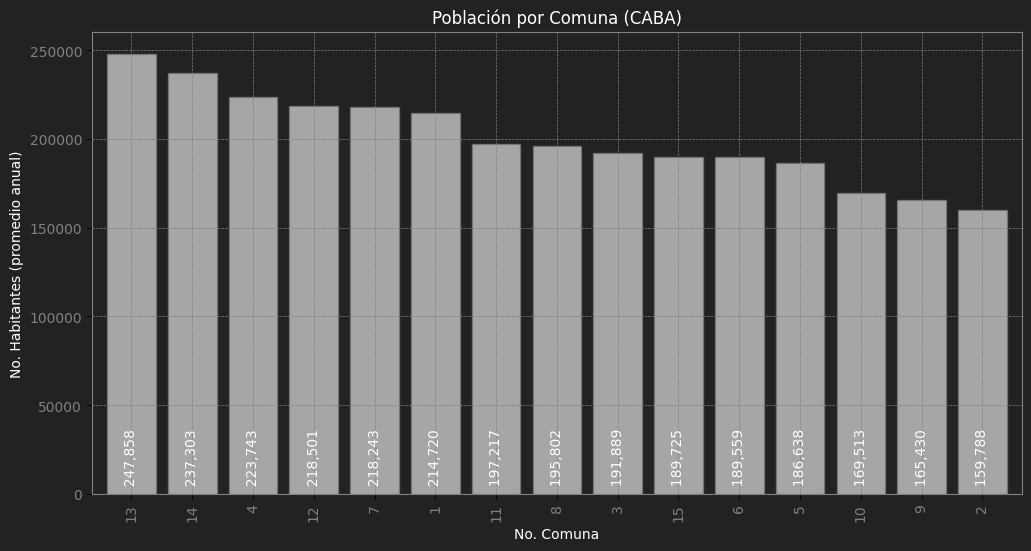

In [14]:
# Agrupar por comuna y sumar la población
poblacion_por_comuna = df_long.groupby('Comuna')['Población'].mean()

# Ordenar la población por comuna de mayor a menor
poblacion_por_comuna = poblacion_por_comuna.sort_values(ascending=False)

# Crear el gráfico de barras con un espaciado mayor
plt.figure(figsize=(12, 6), facecolor='#222222')
ax = poblacion_por_comuna.plot(kind='bar', color='w', edgecolor='gray', alpha=0.6, width=0.8)

# Agregar etiquetas en la base de las barras con formato
for i, v in enumerate(poblacion_por_comuna):
    formatted_value = "{:,.0f}".format(v)
    ax.text(i, 0,'  '+ formatted_value, color='w', ha='center', va='bottom', rotation='vertical') # agregar espacio '  '

# Configuraciones adicionales para personalizar el gráfico
plt.ylabel('No. Habitantes (promedio anual)', color='white')
plt.xlabel('No. Comuna', color='white')
plt.title('Población por Comuna (CABA)', color='white')
plt.xticks(rotation='vertical', color='gray')  # Rotar las etiquetas del eje x en forma vertical y configurar el color gris

# Configurar el fondo negro
plt.gca().set_facecolor('#222222')

# Configurar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Configurar el color de las divisiones de ejes
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Configurar el color de las etiquetas y ticks del eje y
plt.yticks(color='gray')

# Mostrar el gráfico
plt.show()

Se identifican 3 grupos de población que difienren entre sí solo en 500 personas aproximadamente (una distribución muy pareja entre comunas).

#### 8.2. Gráfico de serie de tiempo de población por año:

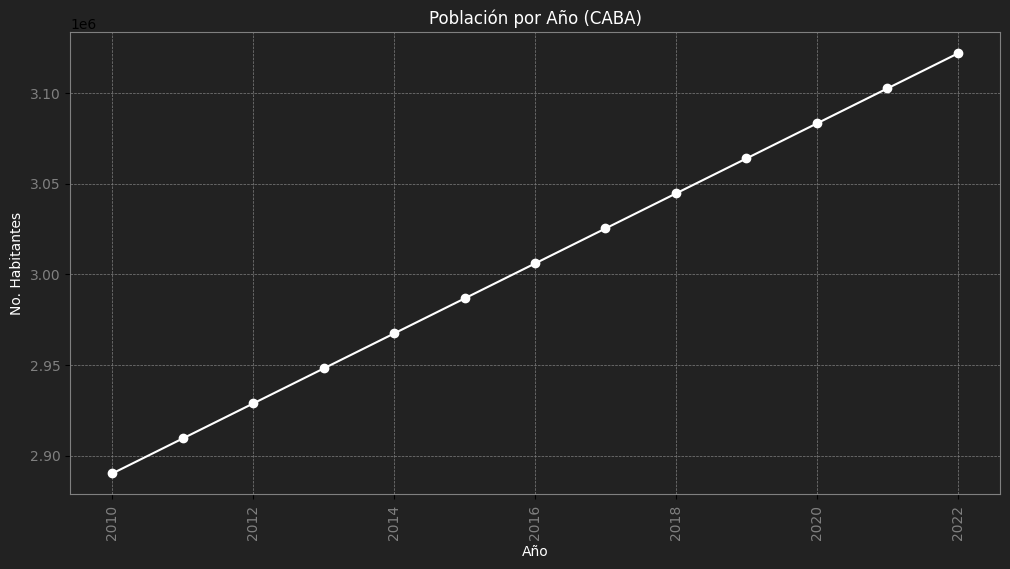

In [15]:
# Agrupar por año y sumar la población
poblacion_por_año = df_long.groupby('Año')['Población'].sum()

# Crear el gráfico de serie
plt.figure(figsize=(12, 6),facecolor='#222222')
poblacion_por_año.plot(kind='line', color='w', marker='o', linestyle='-')

# Configuraciones adicionales para personalizar el gráfico
plt.ylabel('No. Habitantes', color='white')
plt.title('Población por Año (CABA)', color='white')
plt.xlabel('Año', color='white')
plt.xticks(rotation='vertical', color='gray')  # Rotar las etiquetas del eje x en forma vertical y configurar el color blanco

# Configurar el fondo negro
plt.gca().set_facecolor('#222222')

# Configurar el color de las líneas de los ejes
plt.gca().spines['bottom'].set_color('gray')
plt.gca().spines['top'].set_color('gray')
plt.gca().spines['right'].set_color('gray')
plt.gca().spines['left'].set_color('gray')

# Configurar el color de las divisiones de ejes
plt.grid(color='gray', linestyle='--', linewidth=0.5)


# Configurar el color de las etiquetas y ticks del eje y
plt.yticks(color='gray')

# Mostrar el gráfico
plt.show()

La linealidad es parte del supuesto en la elaboración del dataframe por año, si bien en los Censos anterioes de CABA antes del 2010 se muestra un descenso en la población, en el último censo se observa un incremento que presumimos lineal para la construcción del df.